# Exercises

### Within your codeup-data-science directory, create a new repo named anomaly-detection-exercises. This will be where you do your work for this module. Create a repository on GitHub with the same name, and link your local repository to GitHub.

### Save this work in your anomaly-detection-exercises repo. Then add, commit, and push your changes.

### continuous_probabilistic_methods.py or continuous_probabilistic_methods.ipynb 

### 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Using lemonade.csv dataset and focusing on continuous variables:

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
- Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [2]:
lemon_df = pd.read_csv('lemonade.csv')
lemon_df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [3]:
lemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [4]:
multiplier = 1.5
q1 = lemon_df.Temperature.quantile(0.25)
q3 = lemon_df.Temperature.quantile(0.75)

In [5]:
# calculate iqr
iqr = q3 - q1

In [6]:
# calculate upper and lower limits for the whiskers
inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

In [7]:
# which observations in dataframe are outliers based on IQR rule?
lemon_df[(lemon_df.Temperature < inner_lower_fence) | (lemon_df.Temperature > inner_upper_fence)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [8]:
def get_lower_and_upper_bounds(col, k):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    # calculate iqr
    iqr = q3 - q1
    # calculate upper and lower limits for the whiskers
    inner_lower_bound = q1 - (multiplier * iqr)
    inner_upper_bound = q3 + (multiplier * iqr)
    # which observations in dataframe are outliers based on IQR rule?
    return lemon_df[(col < inner_lower_bound) | (col > inner_upper_bound)]
    

In [9]:
get_lower_and_upper_bounds(lemon_df.Temperature, 1.5)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [10]:
get_lower_and_upper_bounds(lemon_df.Rainfall, 1.5)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


In [11]:
get_lower_and_upper_bounds(lemon_df.Flyers, 1.5)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


In [12]:
get_lower_and_upper_bounds(lemon_df.Price, 1.5)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [13]:
get_lower_and_upper_bounds(lemon_df.Sales, 1.5)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


In [14]:
get_lower_and_upper_bounds(lemon_df.Temperature, 3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [15]:
get_lower_and_upper_bounds(lemon_df.Rainfall, 3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


In [16]:
get_lower_and_upper_bounds(lemon_df.Flyers, 3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


In [17]:
get_lower_and_upper_bounds(lemon_df.Price, 3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [18]:
get_lower_and_upper_bounds(lemon_df.Sales, 3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


# 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.

- - Do these make sense?
- - Should certain outliers be kept or removed?

<AxesSubplot:>

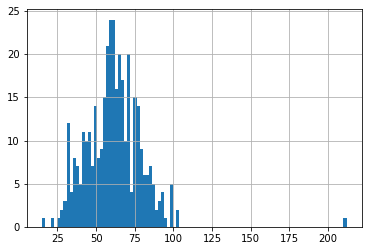

In [19]:
lemon_df.Temperature.hist(bins = 100)

- Temperature more than 200 which does not make a sense.

<AxesSubplot:>

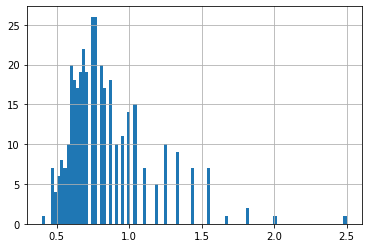

In [20]:
lemon_df.Rainfall.hist(bins = 100)

<AxesSubplot:>

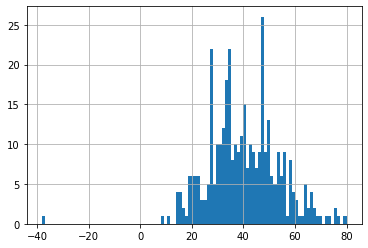

In [21]:
lemon_df.Flyers.hist(bins = 100)

- Flyers is negative which does not make a sense.

<AxesSubplot:>

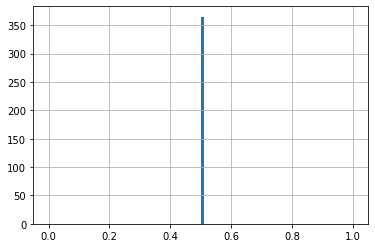

In [22]:
lemon_df.Price.hist(bins = 100)

<AxesSubplot:>

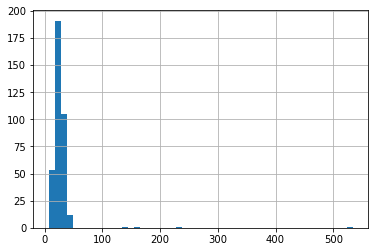

In [44]:
lemon_df.Sales.hist(bins = 50)

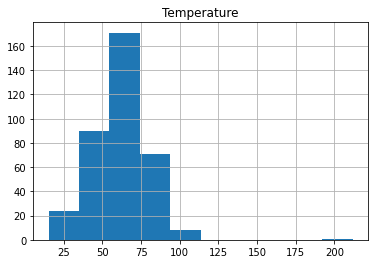

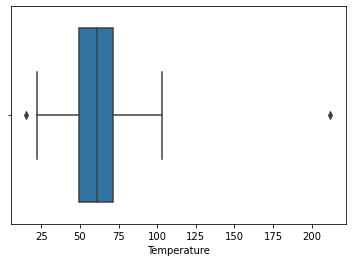

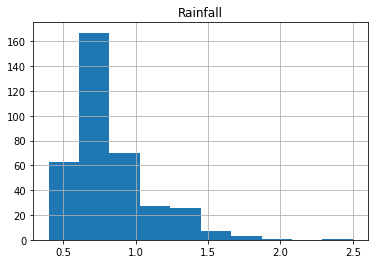

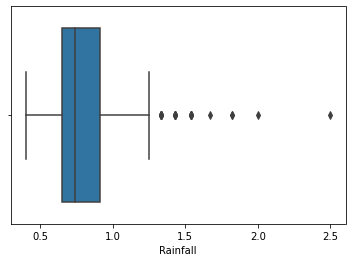

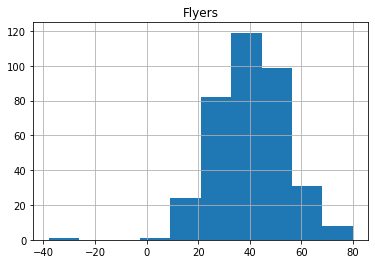

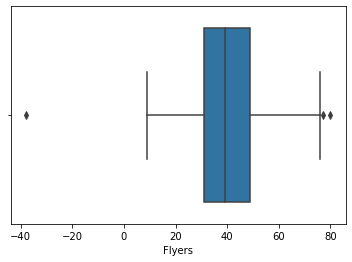

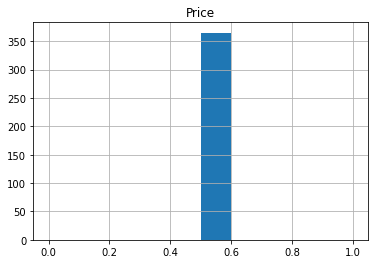

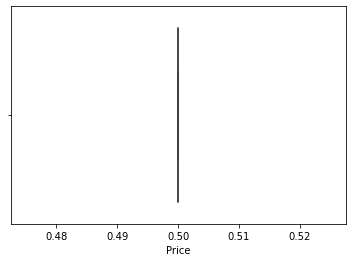

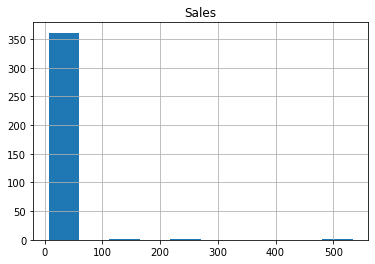

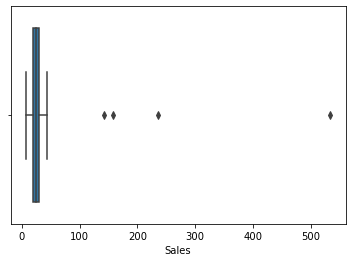

In [24]:
# iterate through columns and create histograms
for col in lemon_df.columns:
#     determine that it is a number type
    if np.issubdtype(lemon_df[col].dtype, np.number):
        lemon_df[col].hist()
        plt.title(col)
        plt.show()
        sns.boxplot(data=lemon_df, x=col)
        plt.show()

In [25]:
σ = lemon_df.Temperature.std()
σ

18.085892298302607

In [26]:
μ = lemon_df.Temperature.mean()
μ

61.224657534246575

- inner_lower_bound = μ - 2σ
- inner_upper_bound = μ + 2σ

In [27]:
def get_lower_and_upper_bounds_2_sigma(col):
    '''This function finds outliers outside 2 σ '''
    σ = col.std()
    μ = col.mean()
    inner_lower_bound = μ - 2 * σ
    inner_upper_bound = μ + 2 * σ
    return lemon_df[(col < inner_lower_fence) | (col > inner_upper_fence)]
    

In [28]:
lemon_df.head(1)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.0,15,0.5,10


In [29]:
get_lower_and_upper_bounds_2_sigma(lemon_df.Temperature)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [30]:
get_lower_and_upper_bounds_2_sigma(lemon_df.Rainfall)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


In [31]:
get_lower_and_upper_bounds_2_sigma(lemon_df.Flyers)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
20,1/21/17,Saturday,36.2,1.25,16,0.5,14
27,1/28/17,Saturday,34.9,1.33,15,0.5,13
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20
337,12/4/17,Monday,34.9,1.54,16,0.5,13
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
350,12/17/17,Sunday,32.2,1.33,16,0.5,14


In [32]:
get_lower_and_upper_bounds_2_sigma(lemon_df.Price)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


In [33]:
get_lower_and_upper_bounds_2_sigma(lemon_df.Sales)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
7,1/8/17,Sunday,37.5,1.18,28,0.5,15
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12


In [34]:
def get_lower_and_upper_bounds(col, k):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    # calculate iqr
    iqr = q3 - q1
    # calculate upper and lower limits for the whiskers
    inner_lower_bound = q1 - (multiplier * iqr)
    inner_upper_bound = q3 + (multiplier * iqr)
    # which observations in dataframe are outliers based on IQR rule?
    return lemon_df[(col < inner_lower_fence) | (col > inner_upper_fence)]

# 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [35]:
def get_lower_and_upper_bounds_3_sigma(col):
    '''This function finds outliers outside 2 σ '''
    σ = col.std()
    μ = col.mean()
    inner_lower_bound = μ - 3 * σ
    inner_upper_bound = μ + 3 * σ
    return lemon_df[(col < inner_lower_fence) | (col > inner_upper_fence)]

In [36]:
lemon_df.head(1)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.0,15,0.5,10


In [37]:
get_lower_and_upper_bounds_3_sigma(lemon_df.Temperature)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [38]:
get_lower_and_upper_bounds_3_sigma(lemon_df.Rainfall)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


In [39]:
get_lower_and_upper_bounds_3_sigma(lemon_df.Flyers)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
20,1/21/17,Saturday,36.2,1.25,16,0.5,14
27,1/28/17,Saturday,34.9,1.33,15,0.5,13
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20
337,12/4/17,Monday,34.9,1.54,16,0.5,13
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
350,12/17/17,Sunday,32.2,1.33,16,0.5,14


In [40]:
get_lower_and_upper_bounds_3_sigma(lemon_df.Price)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


In [41]:
get_lower_and_upper_bounds_3_sigma(lemon_df.Sales)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
7,1/8/17,Sunday,37.5,1.18,28,0.5,15
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
